In [2]:
import numpy  as np
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite as bi
import matplotlib.pyplot as plt
from datetime import datetime
from imp import reload 
import os
from tqdm import tqdm
from scipy import stats as st


import  weighted_network as wn
import dataset_construction as dc

import seaborn as sns
import bipcm

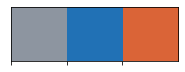

In [2]:
colours=['#8D95A0','#2171b5','#DA6437']
own=sns.color_palette(colours)

sns.palplot(own)
sns.set_palette(own)

# This notebook provides the codes for the figures and tables in the appendix

## Table A.1: Number of treaties with different number of subjects

## Table A.2: Number of IEAs in the UN and UN agencies

In [3]:
#### UN and UN agencies ids: 18,12,16,23,32,67

df_depo=pd.read_csv('IEA_data/depository_rel.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'IEA_data/depository_rel.csv'

## Figure B.1(a）: Number of countries per treaty and Figure B.2(a): Number of treaties per country

In [ ]:
def plot_two(x1,y1,x2,y2,x3,y3,x_lim,y_lim,x_label,y_label,file_name):
   
    figsize = 12,9
    figure, ax = plt.subplots(figsize=figsize)

    A,=plt.plot(x1,y1,color='#2171b5',label='All treaties',linewidth=4)
    B,=plt.plot(x2,y2,c='#8D95A0',label='Excluding UN treaties',linewidth=4, linestyle='--')
    C,=plt.plot(x3,y3,c='#8D95A0',label='Excluding UN & UN agency treaties',linewidth=4, linestyle=':')

   
    font1 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 24,
    }
    legend = plt.legend(handles=[A,B,C],prop=font1,loc='upper left',facecolor=None )
    legend.get_frame().set_linewidth(0.0)

    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    
    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.   
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    # plt.tick_params(labelsize=23)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]
    
    
    plt.yticks(fontsize=25)    
    plt.xticks(fontsize=25)  
    
    plt.grid(axis='y',linestyle=':')
        
    # Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
    plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True) 
    

    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 32,
    }
    plt.xlabel(x_label,font2)
    plt.ylabel(y_label,font2)
    
    file_name_1='significant_country_network/RobustTest/UN/'+file_name+'.pdf'
    plt.savefig(file_name_1)

In [ ]:
df_global_country_agency=pd.read_csv('significant_country_network/RobustTest/UN/bipartite_global_country_UNagency.csv')
df_global_country_UN=pd.read_csv('bipartite_network/total_treaties/global_measure_country_UN.csv')
df_global_country=pd.read_csv('bipartite_network/total_treaties/global_measure_country.csv')


In [ ]:
df_global_treaty_agency=pd.read_csv('significant_country_network/RobustTest/UN/bipartite_global_treaty_UNagency.csv')
df_global_treaty_UN=pd.read_csv('bipartite_network/total_treaties/global_measure_treaty_UN.csv')
df_global_treaty=pd.read_csv('bipartite_network/total_treaties/global_measure_treaty.csv')


In [ ]:
plot_two(df_global_treaty['year'],df_global_treaty['average_degree'],df_global_treaty_UN['year'],df_global_treaty_UN['average_degree'],
         df_global_treaty_agency['year'],df_global_treaty_agency['average_degree'],[1945,2020],[0,35],
         'Year','Average number of treaties per country','AverageTreatyDegree_Bi')

## Figure B.1(b）: Number of countries per treaty and Figure B.2(b): Number of treaties per country

In [ ]:
def plot_frequency(df_input,year_list,start,end, interval,y_lim,x_label,y_label,file_name):

    figsize = 12,9
    
    colours=['#8D95A0','#E4B345','#2171b5','#DA6437']
    df_years=pd.DataFrame()
    
    for year in year_list:

        df = df_input[df_input['year']==year]
        df['binned_d'] = pd.cut(df['degree'],np.arange(start,end,interval))
        to_plot = df[['year','binned_d']].copy()

        df_years[year]=list(to_plot.groupby('binned_d').size())
        
    ax=df_years.plot.bar(width=1.4,figsize=figsize,color=colours,rot=0, grid=False)
        
    x_lim=[0,int(end/interval)]
    
    internal=20
    for y in np.arange(y_lim[0]+internal, y_lim[1]+internal, internal):   
        plt.plot(range(x_lim[0], x_lim[1]), [y] * len(range(x_lim[0], x_lim[1])), "--", lw=1.2, color="black", alpha=0.3)  

    font1 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 24,
    }

    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 

    
    ax.set_ylim(y_lim)
    # plt.tick_params(labelsize=23)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]

    
    # Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
    plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True) 


    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 32,
    }
     
    plt.yticks(fontsize=23)
    
    num=4
    plt.xticks(ticks=np.arange(0,end/interval+num,num),labels=np.arange(0,end+num*interval,num*interval),fontsize=20)
    
    legend = plt.legend(prop=font1,loc='upper right',facecolor=None)
    legend.get_frame().set_linewidth(0.0)
    
    plt.xlabel(x_label,font2)
    plt.ylabel(y_label,font2)
    
    file_output='significant_country_network/weighted/1980/'+file_name+'.pdf'
    plt.savefig(file_output)

In [ ]:
plot_frequency(df_local_measure,[1950,1970,1990,2015],0,195,5,[0,180],'Number of countries per treaty','Number of treaty','TreatyDegree_Bar')


## Figure G.1(a): The bi-adjacency matrix of the bipartite country-treaty network for air and atmosphere in 2015

In [ ]:
df_parties_total=pd.read_csv('IEA_data/parties.csv')

list_TypeofDates=['date_entry_into_force','date_ratification','date_simple_sigNMture','date_definite_sigNMture','date_withdrawal','date_consent_to_be_bound','date_accession_approv','date_acceptance_approv','date_provisioNMl_application','date_succession','date_reservation']
for i in list_TypeofDates:
    df_parties_total[i]=pd.to_datetime(df_parties_total[i],format='%d/%m/%Y')
df_parties_1=df_parties_total[(df_parties_total['date_entry_into_force']<datetime(1947,12,31))|(df_parties_total['date_ratification']<datetime(1947,12,31))]

old_treaties=set(df_parties_1['treaty_id'])
for i in old_treaties:
    df_parties_total=df_parties_total[df_parties_total['treaty_id']!=i]


df_parties=wn.data_selection(df_parties_total,2015, None, [2])
B=wn.bipartite_network(df_parties)

nodes_treaties= {n for n,d in B.nodes(data=True) if d['bipartite']==0}
nodes_parties= set(B) - nodes_treaties
country_degrees,treaty_degrees=bi.degrees(B,nodes_treaties)

country_sorted={k: v for k, v in sorted(dict(country_degrees).items(), key=lambda item: item[1], reverse=True)}
treaty_sorted={k: v for k, v in sorted(dict(treaty_degrees).items(), key=lambda item: item[1], reverse=True)}

bi_matrix=bi.biadjacency_matrix(B,row_order=list(country_sorted.keys()),column_order=list(treaty_sorted.keys()),weight=None)
a_matrix=bi_matrix.A 



In [ ]:
figsize = 12,9
figure, ax = plt.subplots(figsize=figsize)
  

g=sns.heatmap(a_matrix,cmap=['white',colours[1]],cbar=False,linewidths=.01, xticklabels=5, yticklabels=20, alpha = 1)
sns.despine(top=False, right=False, left=False, bottom=False, 
        offset=None, trim=False) # Remove the bottom and right spines from plot(s).

plt.tick_params(labelsize=28)
labels = g.get_xticklabels() + g.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 36,
    }

plt.xlabel('Treaty',font2)
plt.ylabel('Country',font2)
plt.savefig('results/country_treaty_matrix_air_2015.pdf')

## Figures D.1, D.2, D.4, E.1, E.2, E.3 use the same codes as Figures 3-7 in the main paper.

## Figures D.3(a): Distribution of the number of citations 

In [ ]:
df_cite=pd.read_csv('IEA_data/cites_treaty.csv')
dfnc=df_cite.groupby(by='treaty_cited').count()

In [ ]:
dfnc=df_cite.groupby(by='treaty_cited').count()
sns.histplot(x='treaty_id', data=dfnc, color=colours[1],edgecolor='white')

font1 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 15,}

plt.xlabel('Number of citations',font1)
plt.ylabel('Number of IEAs',font1)


file_name='results/'+'NumCite'+'.pdf'
plt.savefig(file_name,  bbox_inches='tight')


## Figure D.3(b): The number of reports for agreements reported less than 300 times

In [ ]:
df_media3=pd.read_excel('FACTIVA_IEA/Treaty_List Main 3.xlsx')

In [ ]:
df1=df_media3[df_media3['sum']>0]
df2=df1[df1['sum']<1000]

ax=sns.histplot(x='sum', data=df2, color=colours[1], edgecolor='white')

font1 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 15,}

plt.xlabel('Number of reports',font1)
plt.ylabel('Number of IEAs',font1)

ax.set_ylim([0,25])


file_name='significant_country_network/RobustTest/Media/'+'NumDisReports_Main3'+'.pdf'
plt.savefig(file_name,  bbox_inches='tight')

# Prepare data for regression

## Centrality measures

In [ ]:
def combined_date(df):
    
    parties=list(set(df['party_code']))
    dfl=[]

    for c in parties:

        df11=df[df['party_code']==c]

        df22=df11[['treaty_id','date_entry_into_force','date_ratification']]
        df33=df22[df22['date_ratification'].notnull()][['treaty_id','date_ratification']].rename(columns={'date_ratification':'date'})
        df44=df22[df22['date_ratification'].isnull()][['treaty_id','date_entry_into_force']].rename(columns={'date_entry_into_force':'date'})

        df55=pd.concat([df33,df44]).sort_values(by='date')
        df55['party_code']=c

        dfl.append(df55)

    dff=pd.concat(dfl)
    
    return dff

In [ ]:
df_parties_total=pd.read_csv('IEA_data/parties.csv')

list_TypeofDates=['date_entry_into_force','date_ratification','date_simple_sigNMture','date_definite_sigNMture','date_withdrawal','date_consent_to_be_bound','date_accession_approv','date_acceptance_approv','date_provisioNMl_application','date_succession','date_reservation']
for i in list_TypeofDates:
    df_parties_total[i]=pd.to_datetime(df_parties_total[i],format='%d/%m/%Y')
df_parties_1=df_parties_total[(df_parties_total['date_entry_into_force']<datetime(1947,12,31))|(df_parties_total['date_ratification']<datetime(1947,12,31))]

old_treaties=set(df_parties_1['treaty_id'])
for i in old_treaties:
    df_parties_total=df_parties_total[df_parties_total['treaty_id']!=i]


dfcom=combined_date(df_parties_total)

df1=dfcom.merge(df_doc[['treaty_id','date_treaty']], how='left', on='treaty_id')
df1['span']=df1.apply(lambda x:round((x['date']-x['date_treaty']).days/365,2), axis=1)

df1['year_treaty']=df1['date_treaty'].map(lambda x:x.year)
df1['year_treaty_pre']=df1['year_treaty'].map(lambda x:x-1)

In [ ]:
df_local=pd.read_csv('significant_country_network/weighted/1980/local_measures_country_network_1948.csv')

years=list(set(df_local['year']))

dfl=[]

for year in years:
#year=2000
    dfr1=df_local[df_local['year']==year]
    dfr1['rank_str']=dfr1['strength'].rank(method='min', ascending=True)
    dfr1['rank_bet']=dfr1['betweenness_centrality'].rank( method='min',ascending=True)
    dfr1['rank_clo']=dfr1['closeness_centrality'].rank(method='min', ascending=True)

    dfr1['rank_str_cut']=pd.cut(dfr1['rank_str'], bins=4, labels=[1,2,3,4])
    dfr1['rank_bet_cut']=pd.cut(dfr1['rank_bet'], bins=4, labels=[1,2,3,4])
    dfr1['rank_clo_cut']=pd.cut(dfr1['rank_clo'], bins=4, labels=[1,2,3,4])


    dfl.append(dfr1)
dfrr=pd.concat(dfl)


In [ ]:
df2=df1.merge(dfrr, how='left', right_on=['year','country'], left_on=['year_treaty_pre','party_code',])
df3=df2.drop(columns=['country','country_iso_a3','year','local_clustering_coefficient','degree'])
df3.rename(columns={'date':'date_rati',},inplace=True)
df3['year_rati']=df3['date_rati'].map(lambda x:x.year)

cols=['treaty_id',
 'date_rati',
'year_rati',
 'party_code',
 'country_name',
 'date_treaty',
'span',
 'year_treaty',
 'year_treaty_pre',
 'strength',
 'closeness_centrality',
 'betweenness_centrality',
'rank_str','rank_bet','rank_clo','rank_str_cut','rank_bet_cut','rank_clo_cut', ]

df4=df3[cols]

df4.to_csv('significant_country_network/RobustTest/Regression/regression_centrality_cut.csv', index=False, sep=',')

## Data of media coverages and citations of treaties

In [ ]:
df1=dfcom.merge(df_doc[['treaty_id','date_treaty']], how='left', on='treaty_id')
df1['span']=df1.apply(lambda x:round((x['date']-x['date_treaty']).days/365,2), axis=1)
df1['date_treaty_pre']=df1['date_treaty'].map(lambda x:x.year-1)

dfcite=pd.read_csv('significant_country_network/RobustTest/Citation/mean_citations.csv', sep=',')
dfmedia=pd.read_csv('significant_country_network/RobustTest/Citation/mean_media.csv', sep=',')

df2=df1.merge(dfcite, how='left', right_on=['year','party_code'], left_on=['date_treaty_pre','party_code'])
df3=df2.drop(columns=['year']).rename(columns={'mean':'mean_citations'})

df4=df3.merge(dfmedia, how='left', right_on=['year','party_code'], left_on=['date_treaty_pre','party_code'])
df5=df4.drop(columns=['year']).rename(columns={'mean':'mean_reports'})

df6=df5.merge(dfloc, how='left', right_on=['country','year'], left_on=['party_code','date_treaty_pre'])
df7=df6[(df6['country'].notnull())&(df6['year'].notnull())].drop(columns=['country','year'])

df7.to_csv('significant_country_network/RobustTest/Regression/regression_citations_media.csv', sep=',', index=False)

## Data of number of UN/UN-agency treaties

In [ ]:
df_depo=pd.read_csv('IEA_data/depository_rel.csv')

# number of UN treaties
df1=dfcom.merge(df_depo, how='left', on='treaty_id')
df2=df1[df1['depository_id']==18]

dfl=[]

for year in range(1948,2016):

    df3=df2[df2['date']<=datetime(year,12,31)].groupby(by='party_code').count().reset_index()[['party_code','treaty_id']].rename(columns={'treaty_id':'num_UN'})
    df3['year']=year
    
    dfl.append(df3)
    
df_UN=pd.concat(dfl)


In [ ]:
# number of UN-agency treaties

df2=dfcom.merge(df_depo, how='left', on='treaty_id')
df3=df2[(df2['depository_id']==12)|(df2['depository_id']==16)|(df2['depository_id']==23)|(df2['depository_id']==32)|(df2['depository_id']==67)]

dfl=[]

for year in range(1948, 2016):
    
    df4=df3[df3['date']<=datetime(year,12,31)]
    df5=df4.groupby(by='party_code').count().reset_index()[['party_code','treaty_id']].rename(columns={'treaty_id':'num_UNa'})
    df5['year']=year
    dfl.append(df5)
df_UNa=pd.concat(dfl)

In [ ]:
# non_UN&UN agency
df2=dfcom.merge(df_depo, how='left', on='treaty_id')
df3=df2[(df2['depository_id']!=18)&(df2['depository_id']!=12)&(df2['depository_id']!=16)&(df2['depository_id']!=23)&(df2['depository_id']!=32)&(df2['depository_id']!=67)]

dfl=[]

for year in range(1948, 2016):
    
    df4=df3[df3['date']<=datetime(year,12,31)]
    df5=df4.groupby(by='party_code').count().reset_index()[['party_code','treaty_id']].rename(columns={'treaty_id':'num_nonUN&UNa'})
    df5['year']=year
    dfl.append(df5)
df_non=pd.concat(dfl)

In [ ]:
dfun=df_UN.merge(df_UNa, how='outer', on=['party_code','year'])
dfunn=dfun.merge(df_non, how='outer',on=['party_code','year'])

dff=dfunn.sort_values(by=['party_code','year'])

In [ ]:
# Select the same data points as centrality measures
df1=dfcom.merge(df_doc[['treaty_id','date_treaty']], how='left', on='treaty_id')
df1['span']=df1.apply(lambda x:round((x['date']-x['date_treaty']).days/365,2), axis=1)


df1['year_treaty']=df1['date_treaty'].map(lambda x:x.year)
df1['year_treaty_pre']=df1['year_treaty'].map(lambda x:x-1)

df2=df1.merge(dff, how='left', right_on=['year','party_code'], left_on=['year_treaty_pre','party_code',])

df2.rename(columns={'date':'date_rati',},inplace=True)
df2['year_rati']=df2['date_rati'].map(lambda x:x.year)

cols=['treaty_id',
 'date_rati',
'year_rati',
 'party_code',
 'date_treaty',

 'span',
 'year_treaty',
 'year_treaty_pre',
 'num_UN',
 'year',
 'num_UNa',
'num_nonUN&UNa',
 ]

dfr = pd.DataFrame(np.zeros((len(df2), 3)), columns=['num_UN','num_UNa','num_nonUN&UNa'])
df3=df2[cols].fillna(dfr).drop(columns=['year'])

dfloc=df_local[['country','year']]

df4=df3.merge(dfloc, how='left', right_on=['country','year'], left_on=['party_code','year_treaty_pre'])
df5=df4[(df4['country'].notnull())&(df4['year'].notnull())].drop(columns=['country','year'])

df5.to_csv('significant_country_network/RobustTest/Regression/regression_UN.csv', sep=',', index=False)